# Heart disease detection using Machine Learning

# 1.Problem Defination
Given the data of the various clinical parameters about a patient predict whether the patient has Heart disease or not.

# 2.Data
The Data on which this study is to be performed is taken from kaggle datasets,website link:https://www.kaggle.com/johnsmith88/heart-disease-dataset


# 3.Evaluation
Aim is the have accuracy of atleast 95% accuracy in predicting that a patient has Heart disease or not.

# 4.Features
The features considered for this study is as follows:
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

# Preparing the Tools 

In [74]:
# import all the tools we need

# regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation metrics
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve
from sklearn.metrics import plot_confusion_matrix


#     Load Data

In [75]:
df=pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
df.shape

(303, 14)

In [77]:
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [78]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# EDA

In [79]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

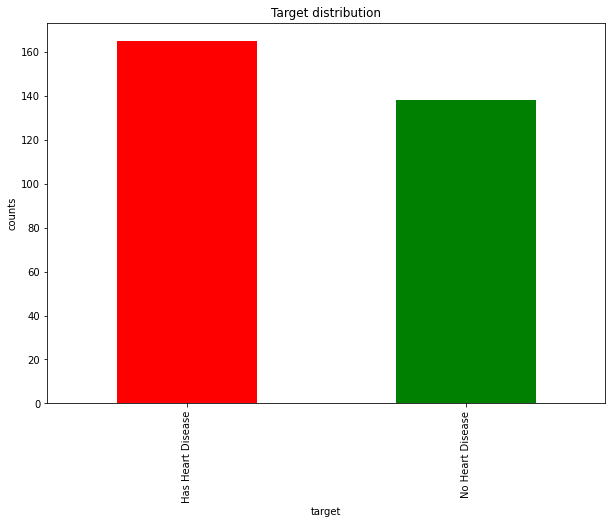

In [80]:
df['target'].value_counts().plot(kind='bar',xlabel='target',ylabel="counts",color=['red','green'],title='Target distribution',figsize=(10,7))
plt.xticks([1,0],['No Heart Disease',"Has Heart Disease"]);


**inference:there is no imbalance between the two labels.**

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**inference:there is missing data.**

In [83]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Effect of Sex on Target


In [84]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [85]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [86]:
# probability of having heart disease given patient is female
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

In [87]:
72/(72+24)

0.75

In [88]:
# probability of having heart disease given patient is male
93/(93+114)

0.4492753623188406

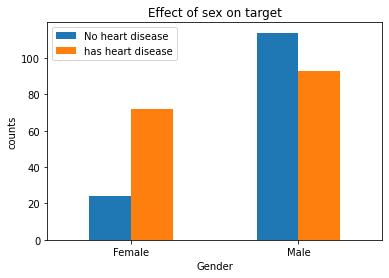

In [89]:
pd.crosstab(df['sex'],df['target']).plot(kind='bar',title='Effect of sex on target',ylabel='counts',xlabel="Gender")
plt.legend(["No heart disease","has heart disease"])
plt.xticks([0,1],["Female",'Male'],rotation=0);


**inference:being a female there is a higher probability of having heart disease.**

Age vs Max heart rate('thalach') for heart disease

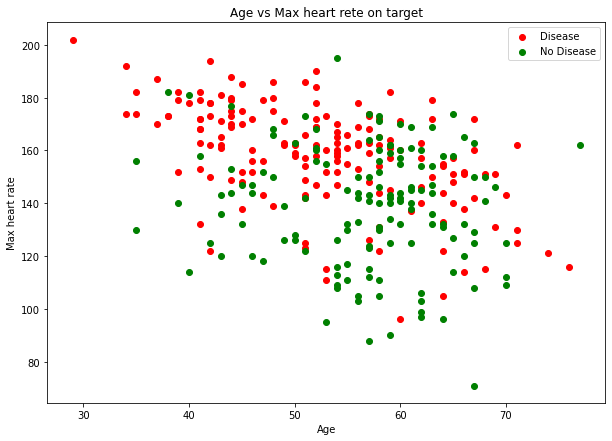

In [90]:
# for patients having heart disease
plt.figure(figsize=(10,7))
plt.scatter(df.age[df['target']==1],
             df.thalach[df['target']==1],color='red',label='Disease')
# for patients not having heart disease
# plt.figure(figsize=(10,7))
plt.scatter(df.age[df['target']==0],
             df.thalach[df['target']==0],color='green',label='No Disease')
plt.ylabel('Max heart rate')
plt.xlabel('Age')
plt.title('Age vs Max heart rete on target')
plt.legend()

**inference:no visual trends.**

Distribution of Age

<AxesSubplot:ylabel='Frequency'>

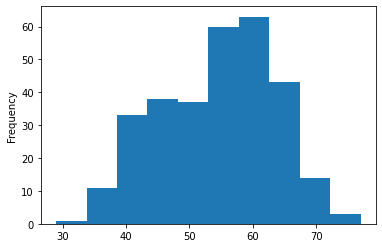

In [91]:
df.age.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

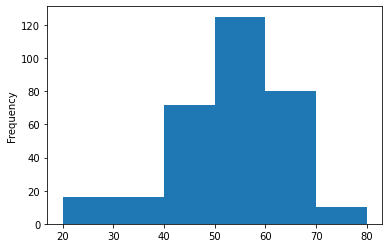

In [92]:
df.age.plot(kind='hist',bins=[20,40,50,60,70,80])

**distribution of age given the patient has heart disease**

<AxesSubplot:ylabel='Frequency'>

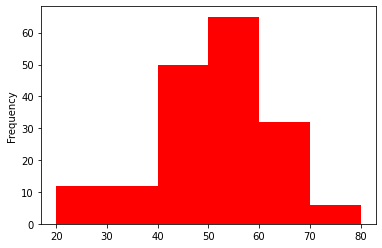

In [93]:
df.age[df['target']==1].plot(kind='hist',bins=[20,40,50,60,70,80],color='red')


**distribution of age given the patient has does not have heart disease**

<AxesSubplot:ylabel='Frequency'>

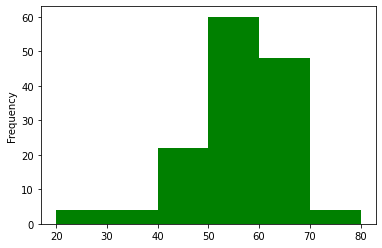

In [94]:
df.age[df['target']==0].plot(kind='hist',bins=[20,40,50,60,70,80],color='g')

**inference:it is clear that majority of the patients are in the age range 40-70, also patients in this age group have 
    higher probability of having heart disease.**

Heart Disease frequency as per chest pain

In [95]:
df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

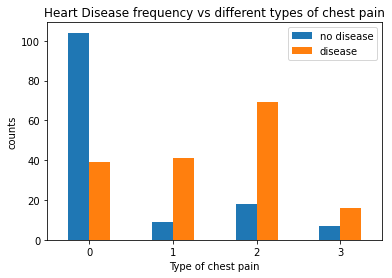

In [96]:
pd.crosstab(df['cp'],df['target']).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Type of chest pain')
plt.ylabel('counts')

plt.title('Heart Disease frequency vs different types of chest pain')
plt.legend(['no disease','disease'])

**inference:patients having chest pain of type-2,have higher probability of having heart disease.**

In [97]:
# Checking the Co-relations among the features and targets
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


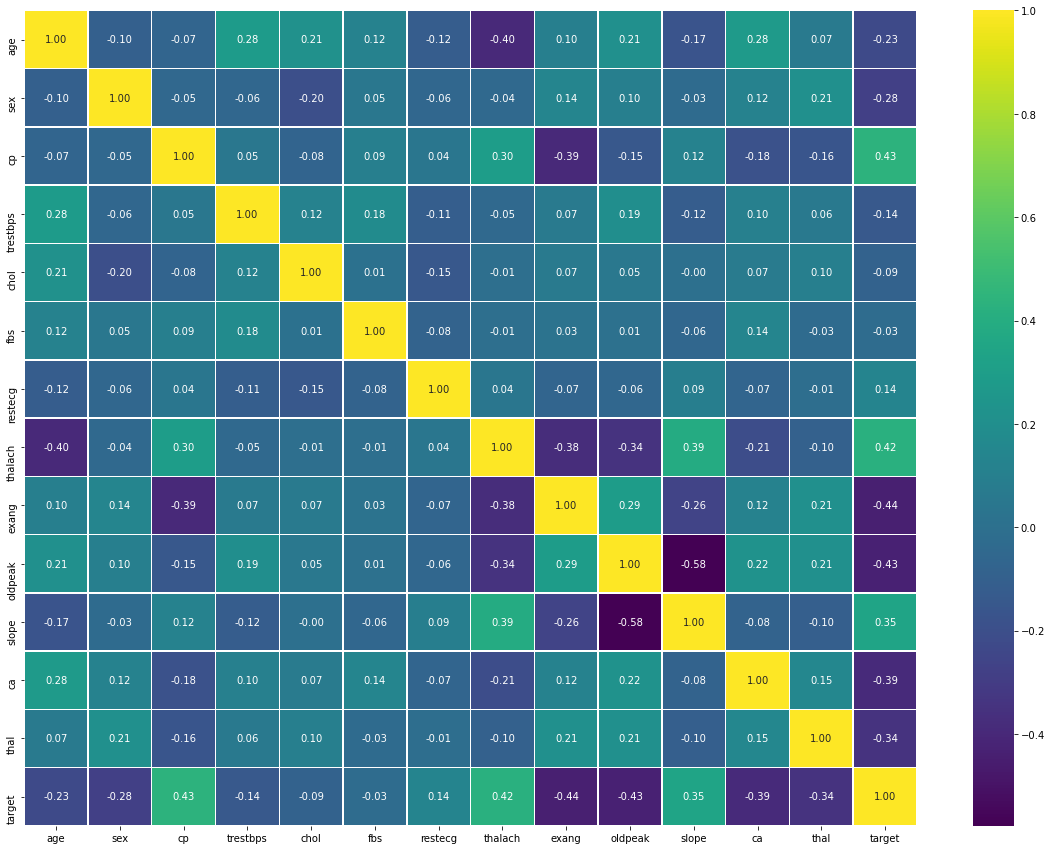

In [98]:
# correlation matrix usign seaborn
corr_matric=df.corr()
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(corr_matric,annot=True,linewidths=0.5,fmt='.2f',cmap='viridis')

Text(0, 0.5, 'counts')

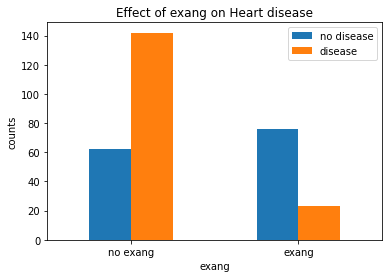

In [99]:
# exang vs target
pd.crosstab(df['exang'],df['target']).plot(kind='bar');
plt.xticks([0,1],['no exang','exang'],rotation=0,)
plt.legend(['no disease','disease'])
plt.title("Effect of exang on Heart disease")
plt.ylabel('counts')

**inference:there is a -ve correlation between exang and having heart disease** 


Effect of Max heart rate on Heart disease

Text(0.5, 1.0, 'Max Heart rate distribution')

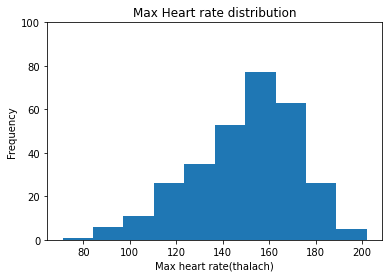

In [100]:
df.thalach.plot(kind='hist',bins=10)
plt.ylim([0,100])
plt.xlabel("Max heart rate(thalach)")
plt.title("Max Heart rate distribution")


Text(0.5, 1.0, 'Max Heart rate distribution for patients having Heart Disease')

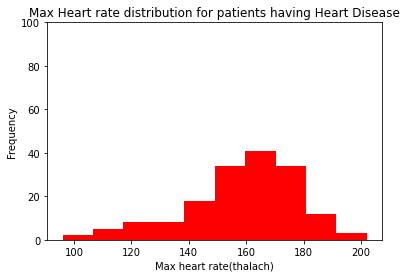

In [101]:
df.thalach[df['target']==1].plot(kind='hist',bins=10,color='red')
plt.ylim([0,100]);

plt.xlabel("Max heart rate(thalach)")
plt.title("Max Heart rate distribution for patients having Heart Disease")

Text(0.5, 1.0, 'Max Heart rate distribution for patients not having Heart Disease')

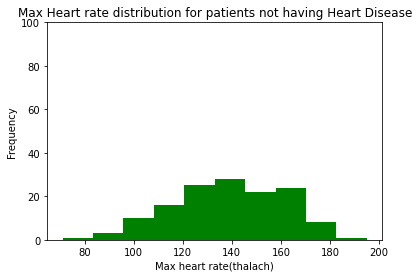

In [102]:
df.thalach[df['target']==0].plot(kind='hist',bins=10,color='g')
plt.ylim([0,100]);
plt.xlabel("Max heart rate(thalach)")
plt.title("Max Heart rate distribution for patients not having Heart Disease")


**inference:patients having higher thalach(max heart rate) have higher chance of having
    heart disease**

# 5.Modelling

In [103]:
X=df.drop(['target'],axis=1)
y=df['target']

In [104]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [105]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [106]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [107]:
X_train.shape,X_test.shape

((242, 13), (61, 13))

Making a various classification models to try out:


In [108]:
models={'Logistic Regression':LogisticRegression(),
         'KNN':KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier()
       }

def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    model_scores={}
    for name,clf in models.items():
        clf.fit(X_train,y_train)
        
        model_scores[name]=clf.score(X_test,y_test)
        
    return model_scores
    

In [109]:
model_scores=fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\shetg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

In [110]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.852459


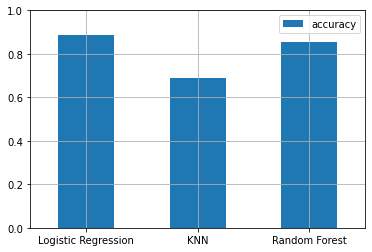

In [111]:
model_compare.T.plot(kind='bar',grid=True)
plt.xticks(rotation=0)
plt.ylim([0,1]);

**In the baseline phase,Logistic Regression accuracy>Random Forest >KNN**

# Hyperparameter tuning

**KNN**

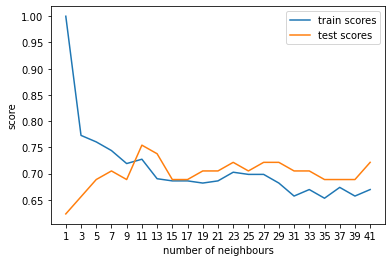

In [112]:
train_scores=[]
test_scores=[]
clf=KNeighborsClassifier()
# find the optimal value for neighours(k) in KNN.
for i in range(1,42,2):
    clf.set_params(n_neighbors=i)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train,y_train))
    test_scores.append(clf.score(X_test,y_test))

plt.plot(range(1,42,2),train_scores,label="train scores")
plt.plot(range(1,42,2),test_scores,label="test scores")
plt.xticks(np.arange(1,42,2))
plt.xlabel("number of neighbours")
plt.ylabel("score")

plt.legend();

In [113]:
k=1+(test_scores.index(max(test_scores)))*2
k


11

In [114]:
print(f"Max test score using KNN is {max(test_scores)*100:.2f}%")

Max test score using KNN is 75.41%


**inference:even after tuning the max accuracy from KNN is less than Logistic Regression and RandomForest**

Logistic Regression & Random Forest using RandamisedSearchCV

In [115]:
# hyperparameter tunning using RandamisedSearchCV
# Grid for Logistic Regression
grid_Lr={'C':np.logspace(-4,4,20),
          'solver':['liblinear'],
           'max_iter':[x for x in range(100,501,50)]
        }
# Grid for RandomForest
grid_rf={'n_estimators':np.arange(10,1001,50),
          'max_depth':[None]+[x for x in range(2,27,2)],
           'min_samples_split':np.arange(2,21,2),
            'min_samples_leaf':np.arange(1,21,2),
             }

In [116]:
[None]+[x for x in range(2,27,2)]

[None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]

In [117]:
# RandamisedSearchCV for Logistic Regression
np.random.seed(42)
rs_model=RandomizedSearchCV(LogisticRegression(),
                            param_distributions=grid_Lr,
                            n_iter=60,
                            cv=5,
                            verbose=True
                             )
rs_model.fit(X_train,y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=60,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 150, 200, 250, 300,
                                                     350, 400, 450, 500],
                                        'solver': ['liblinear']},
                   verbose=True)

In [118]:
rs_model.best_params_

{'solver': 'liblinear', 'max_iter': 400, 'C': 0.23357214690901212}

In [119]:
lr=rs_model.score(X_test,y_test)

In [120]:
print(f"Max test score using Logistic Regression is {lr*100:.2f}%")

Max test score using Logistic Regression is 88.52%


In [121]:
# RandamisedSearchCV for Random Forest
np.random.seed(42)
rs_model=RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),
                            param_distributions=grid_rf,
                               cv=5,
                            n_iter=60,
                         
                            verbose=True
                             )
rs_model.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=60,
                   param_distributions={'max_depth': [None, 2, 4, 6, 8, 10, 12,
                                                      14, 16, 18, 20, 22, 24,
                                                      26],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [122]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': 6}

In [123]:
rf=rs_model.score(X_test,y_test)

In [124]:
print(f"Max test score using Random Forest is {rf*100:.2f}%")

Max test score using Random Forest is 85.25%


**inference:Using RandomisedSearchCV Logistic Regression has higher score than Random Forest.**

GridSearchCV on Logistic Regression

In [125]:
# Grid for Logistic Regression
# adjusting these values as per results from RandomSearchCV
grid_Lr={'C':np.logspace(-4,0,30),
          'solver':['liblinear'],
           'max_iter':[x for x in range(50,251,10)]
        }


In [126]:
gs_model=GridSearchCV(LogisticRegression(),
                      param_grid=grid_Lr,
                    cv=5,
                      verbose=2
                 )
gs_model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 630 candidates, totalling 3150 fits
[CV] C=0.0001, max_iter=50, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=50, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=50, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=50, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=50, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=60, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=60, solver=liblinear .........................
[CV] ........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.0001, max_iter=80, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=80, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=80, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=80, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=80, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=80, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=80, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=80, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=90, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=90, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=90, solver=liblinear .........................
[CV] .......... C=0.0001, max_iter=90, solver=liblinear, total=   0.0s
[CV] 

[CV] ......... C=0.0001, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=220, solver=liblinear ........................
[CV] ......... C=0.0001, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=220, solver=liblinear ........................
[CV] ......... C=0.0001, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=230, solver=liblinear ........................
[CV] ......... C=0.0001, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=230, solver=liblinear ........................
[CV] ......... C=0.0001, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=230, solver=liblinear ........................
[CV] ......... C=0.0001, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=230, solver=liblinear ........................
[CV] ......... C=0.0001, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.0001, max_iter=230, solver=liblinear ........................
[CV] .

[CV]  C=0.00013738237958832623, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.00013738237958832623, max_iter=130, solver=liblinear ........
[CV]  C=0.00013738237958832623, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.00013738237958832623, max_iter=130, solver=liblinear ........
[CV]  C=0.00013738237958832623, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.00013738237958832623, max_iter=130, solver=liblinear ........
[CV]  C=0.00013738237958832623, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.00013738237958832623, max_iter=130, solver=liblinear ........
[CV]  C=0.00013738237958832623, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.00013738237958832623, max_iter=130, solver=liblinear ........
[CV]  C=0.00013738237958832623, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.00013738237958832623, max_iter=140, solver=liblinear ........
[CV]  C=0.00013738237958832623, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.0001373823795883262

[CV]  C=0.00018873918221350977, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=60, solver=liblinear .........
[CV]  C=0.00018873918221350977, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=60, solver=liblinear .........
[CV]  C=0.00018873918221350977, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=70, solver=liblinear .........
[CV]  C=0.00018873918221350977, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=70, solver=liblinear .........
[CV]  C=0.00018873918221350977, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=70, solver=liblinear .........
[CV]  C=0.00018873918221350977, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=70, solver=liblinear .........
[CV]  C=0.00018873918221350977, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_

[CV]  C=0.00018873918221350977, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=190, solver=liblinear ........
[CV]  C=0.00018873918221350977, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=200, solver=liblinear ........
[CV]  C=0.00018873918221350977, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=200, solver=liblinear ........
[CV]  C=0.00018873918221350977, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=200, solver=liblinear ........
[CV]  C=0.00018873918221350977, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=200, solver=liblinear ........
[CV]  C=0.00018873918221350977, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.00018873918221350977, max_iter=200, solver=liblinear ........
[CV]  C=0.00018873918221350977, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.0001887391822135097

[CV]  C=0.0002592943797404667, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=130, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=130, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=130, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=140, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=140, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=140, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_i

[CV]  C=0.0002592943797404667, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=240, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=240, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=250, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=250, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=250, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_iter=250, solver=liblinear .........
[CV]  C=0.0002592943797404667, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0002592943797404667, max_i

[CV]  C=0.0003562247890262444, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, max_iter=160, solver=liblinear .........
[CV]  C=0.0003562247890262444, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, max_iter=160, solver=liblinear .........
[CV]  C=0.0003562247890262444, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, max_iter=160, solver=liblinear .........
[CV]  C=0.0003562247890262444, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, max_iter=160, solver=liblinear .........
[CV]  C=0.0003562247890262444, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, max_iter=170, solver=liblinear .........
[CV]  C=0.0003562247890262444, max_iter=170, solver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, max_iter=170, solver=liblinear .........
[CV]  C=0.0003562247890262444, max_iter=170, solver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, max_i

[CV]  C=0.0004893900918477494, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=90, solver=liblinear ..........
[CV]  C=0.0004893900918477494, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=90, solver=liblinear ..........
[CV]  C=0.0004893900918477494, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=90, solver=liblinear ..........
[CV]  C=0.0004893900918477494, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=90, solver=liblinear ..........
[CV]  C=0.0004893900918477494, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=100, solver=liblinear .........
[CV]  C=0.0004893900918477494, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=100, solver=liblinear .........
[CV]  C=0.0004893900918477494, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=1

[CV]  C=0.0004893900918477494, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=240, solver=liblinear .........
[CV]  C=0.0004893900918477494, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=240, solver=liblinear .........
[CV]  C=0.0004893900918477494, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=240, solver=liblinear .........
[CV]  C=0.0004893900918477494, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=240, solver=liblinear .........
[CV]  C=0.0004893900918477494, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=250, solver=liblinear .........
[CV]  C=0.0004893900918477494, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_iter=250, solver=liblinear .........
[CV]  C=0.0004893900918477494, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0004893900918477494, max_i

[CV] C=0.0006723357536499335, max_iter=160, solver=liblinear .........
[CV]  C=0.0006723357536499335, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, max_iter=160, solver=liblinear .........
[CV]  C=0.0006723357536499335, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, max_iter=160, solver=liblinear .........
[CV]  C=0.0006723357536499335, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, max_iter=160, solver=liblinear .........
[CV]  C=0.0006723357536499335, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, max_iter=160, solver=liblinear .........
[CV]  C=0.0006723357536499335, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, max_iter=170, solver=liblinear .........
[CV]  C=0.0006723357536499335, max_iter=170, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, max_iter=170, solver=liblinear .........
[CV]  C=0.0006723357536499335, max_iter=1

[CV]  C=0.0009236708571873865, max_iter=80, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=80, solver=liblinear ..........
[CV]  C=0.0009236708571873865, max_iter=80, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=80, solver=liblinear ..........
[CV]  C=0.0009236708571873865, max_iter=80, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=80, solver=liblinear ..........
[CV]  C=0.0009236708571873865, max_iter=80, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=90, solver=liblinear ..........
[CV]  C=0.0009236708571873865, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=90, solver=liblinear ..........
[CV]  C=0.0009236708571873865, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=90, solver=liblinear ..........
[CV]  C=0.0009236708571873865, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=90,

[CV]  C=0.0009236708571873865, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=230, solver=liblinear .........
[CV]  C=0.0009236708571873865, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=230, solver=liblinear .........
[CV]  C=0.0009236708571873865, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=230, solver=liblinear .........
[CV]  C=0.0009236708571873865, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=230, solver=liblinear .........
[CV]  C=0.0009236708571873865, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=230, solver=liblinear .........
[CV]  C=0.0009236708571873865, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_iter=240, solver=liblinear .........
[CV]  C=0.0009236708571873865, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.0009236708571873865, max_i

[CV] C=0.0012689610031679222, max_iter=130, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=130, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=130, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=130, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=140, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=140, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=140, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=1

[CV]  C=0.0012689610031679222, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=240, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=250, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=250, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=250, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=250, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, max_iter=250, solver=liblinear .........
[CV]  C=0.0012689610031679222, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.0017433288221999873, max_i

[CV]  C=0.0017433288221999873, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.0017433288221999873, max_iter=150, solver=liblinear .........
[CV]  C=0.0017433288221999873, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.0017433288221999873, max_iter=150, solver=liblinear .........
[CV]  C=0.0017433288221999873, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.0017433288221999873, max_iter=160, solver=liblinear .........
[CV]  C=0.0017433288221999873, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0017433288221999873, max_iter=160, solver=liblinear .........
[CV]  C=0.0017433288221999873, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0017433288221999873, max_iter=160, solver=liblinear .........
[CV]  C=0.0017433288221999873, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0017433288221999873, max_iter=160, solver=liblinear .........
[CV]  C=0.0017433288221999873, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.0017433288221999873, max_i

[CV]  C=0.002395026619987486, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=60, solver=liblinear ...........
[CV]  C=0.002395026619987486, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=60, solver=liblinear ...........
[CV]  C=0.002395026619987486, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=60, solver=liblinear ...........
[CV]  C=0.002395026619987486, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=60, solver=liblinear ...........
[CV]  C=0.002395026619987486, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=60, solver=liblinear ...........
[CV]  C=0.002395026619987486, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=70, solver=liblinear ...........
[CV]  C=0.002395026619987486, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=70, solver=

[CV]  C=0.002395026619987486, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=200, solver=liblinear ..........
[CV]  C=0.002395026619987486, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=210, solver=liblinear ..........
[CV]  C=0.002395026619987486, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=210, solver=liblinear ..........
[CV]  C=0.002395026619987486, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=210, solver=liblinear ..........
[CV]  C=0.002395026619987486, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=210, solver=liblinear ..........
[CV]  C=0.002395026619987486, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=210, solver=liblinear ..........
[CV]  C=0.002395026619987486, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, max_iter=220,

[CV]  C=0.0032903445623126675, max_iter=110, solver=liblinear, total=   0.0s
[CV] C=0.0032903445623126675, max_iter=110, solver=liblinear .........
[CV]  C=0.0032903445623126675, max_iter=110, solver=liblinear, total=   0.0s
[CV] C=0.0032903445623126675, max_iter=120, solver=liblinear .........
[CV]  C=0.0032903445623126675, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.0032903445623126675, max_iter=120, solver=liblinear .........
[CV]  C=0.0032903445623126675, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.0032903445623126675, max_iter=120, solver=liblinear .........
[CV]  C=0.0032903445623126675, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.0032903445623126675, max_iter=120, solver=liblinear .........
[CV]  C=0.0032903445623126675, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.0032903445623126675, max_iter=120, solver=liblinear .........
[CV]  C=0.0032903445623126675, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.0032903445623126675, max_i

[CV]  C=0.004520353656360241, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=50, solver=liblinear ...........
[CV]  C=0.004520353656360241, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=50, solver=liblinear ...........
[CV]  C=0.004520353656360241, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=50, solver=liblinear ...........
[CV]  C=0.004520353656360241, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=50, solver=liblinear ...........
[CV]  C=0.004520353656360241, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=60, solver=liblinear ...........
[CV]  C=0.004520353656360241, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=60, solver=liblinear ...........
[CV]  C=0.004520353656360241, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=60, solver=

[CV] C=0.004520353656360241, max_iter=170, solver=liblinear ..........
[CV]  C=0.004520353656360241, max_iter=170, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=170, solver=liblinear ..........
[CV]  C=0.004520353656360241, max_iter=170, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=170, solver=liblinear ..........
[CV]  C=0.004520353656360241, max_iter=170, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=170, solver=liblinear ..........
[CV]  C=0.004520353656360241, max_iter=170, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=180, solver=liblinear ..........
[CV]  C=0.004520353656360241, max_iter=180, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=180, solver=liblinear ..........
[CV]  C=0.004520353656360241, max_iter=180, solver=liblinear, total=   0.0s
[CV] C=0.004520353656360241, max_iter=180, solver=liblinear ..........
[CV]  C=0.004520353656360241, max_iter=180, sol

[CV]  C=0.006210169418915616, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=90, solver=liblinear ...........
[CV]  C=0.006210169418915616, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=90, solver=liblinear ...........
[CV]  C=0.006210169418915616, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=100, solver=liblinear ..........
[CV]  C=0.006210169418915616, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=100, solver=liblinear ..........
[CV]  C=0.006210169418915616, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=100, solver=liblinear ..........
[CV]  C=0.006210169418915616, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=100, solver=liblinear ..........
[CV]  C=0.006210169418915616, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=100, so

[CV]  C=0.006210169418915616, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=200, solver=liblinear ..........
[CV]  C=0.006210169418915616, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=210, solver=liblinear ..........
[CV]  C=0.006210169418915616, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=210, solver=liblinear ..........
[CV]  C=0.006210169418915616, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=210, solver=liblinear ..........
[CV]  C=0.006210169418915616, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=210, solver=liblinear ..........
[CV]  C=0.006210169418915616, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=210, solver=liblinear ..........
[CV]  C=0.006210169418915616, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.006210169418915616, max_iter=220,

[CV]  C=0.008531678524172805, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, max_iter=140, solver=liblinear ..........
[CV]  C=0.008531678524172805, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, max_iter=140, solver=liblinear ..........
[CV]  C=0.008531678524172805, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, max_iter=140, solver=liblinear ..........
[CV]  C=0.008531678524172805, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, max_iter=140, solver=liblinear ..........
[CV]  C=0.008531678524172805, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, max_iter=140, solver=liblinear ..........
[CV]  C=0.008531678524172805, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, max_iter=150, solver=liblinear ..........
[CV]  C=0.008531678524172805, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.008531678524172805, max_iter=150,

[CV] C=0.011721022975334805, max_iter=70, solver=liblinear ...........
[CV]  C=0.011721022975334805, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=70, solver=liblinear ...........
[CV]  C=0.011721022975334805, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=70, solver=liblinear ...........
[CV]  C=0.011721022975334805, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=70, solver=liblinear ...........
[CV]  C=0.011721022975334805, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=80, solver=liblinear ...........
[CV]  C=0.011721022975334805, max_iter=80, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=80, solver=liblinear ...........
[CV]  C=0.011721022975334805, max_iter=80, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=80, solver=liblinear ...........
[CV]  C=0.011721022975334805, max_iter=80, solver=lib

[CV]  C=0.011721022975334805, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=210, solver=liblinear ..........
[CV]  C=0.011721022975334805, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=210, solver=liblinear ..........
[CV]  C=0.011721022975334805, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=210, solver=liblinear ..........
[CV]  C=0.011721022975334805, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=220, solver=liblinear ..........
[CV]  C=0.011721022975334805, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=220, solver=liblinear ..........
[CV]  C=0.011721022975334805, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=220, solver=liblinear ..........
[CV]  C=0.011721022975334805, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.011721022975334805, max_iter=220,

[CV]  C=0.01610262027560939, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, max_iter=130, solver=liblinear ...........
[CV]  C=0.01610262027560939, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, max_iter=130, solver=liblinear ...........
[CV]  C=0.01610262027560939, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, max_iter=130, solver=liblinear ...........
[CV]  C=0.01610262027560939, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, max_iter=130, solver=liblinear ...........
[CV]  C=0.01610262027560939, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, max_iter=130, solver=liblinear ...........
[CV]  C=0.01610262027560939, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, max_iter=140, solver=liblinear ...........
[CV]  C=0.01610262027560939, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.01610262027560939, max_iter=140, solver=

[CV]  C=0.02212216291070448, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=70, solver=liblinear ............
[CV]  C=0.02212216291070448, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=70, solver=liblinear ............
[CV]  C=0.02212216291070448, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=70, solver=liblinear ............
[CV]  C=0.02212216291070448, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=70, solver=liblinear ............
[CV]  C=0.02212216291070448, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=70, solver=liblinear ............
[CV]  C=0.02212216291070448, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=80, solver=liblinear ............
[CV]  C=0.02212216291070448, max_iter=80, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=80, solver=liblinea

[CV]  C=0.02212216291070448, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=190, solver=liblinear ...........
[CV]  C=0.02212216291070448, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=190, solver=liblinear ...........
[CV]  C=0.02212216291070448, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=190, solver=liblinear ...........
[CV]  C=0.02212216291070448, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=190, solver=liblinear ...........
[CV]  C=0.02212216291070448, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=200, solver=liblinear ...........
[CV]  C=0.02212216291070448, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=200, solver=liblinear ...........
[CV]  C=0.02212216291070448, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.02212216291070448, max_iter=200, solver=

[CV]  C=0.03039195382313198, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=100, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=100, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=100, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=100, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=100, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=110, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=110, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=110, solver=l

[CV]  C=0.03039195382313198, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=220, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=220, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=230, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=230, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=230, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=230, solver=liblinear ...........
[CV]  C=0.03039195382313198, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.03039195382313198, max_iter=230, solver=

[CV]  C=0.041753189365604, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.041753189365604, max_iter=150, solver=liblinear .............
[CV]  C=0.041753189365604, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.041753189365604, max_iter=150, solver=liblinear .............
[CV]  C=0.041753189365604, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.041753189365604, max_iter=160, solver=liblinear .............
[CV]  C=0.041753189365604, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.041753189365604, max_iter=160, solver=liblinear .............
[CV]  C=0.041753189365604, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.041753189365604, max_iter=160, solver=liblinear .............
[CV]  C=0.041753189365604, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.041753189365604, max_iter=160, solver=liblinear .............
[CV]  C=0.041753189365604, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.041753189365604, max_iter=160, solver=liblinear ......

[CV]  C=0.05736152510448681, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=60, solver=liblinear ............
[CV]  C=0.05736152510448681, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=60, solver=liblinear ............
[CV]  C=0.05736152510448681, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=60, solver=liblinear ............
[CV]  C=0.05736152510448681, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=60, solver=liblinear ............
[CV]  C=0.05736152510448681, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=60, solver=liblinear ............
[CV]  C=0.05736152510448681, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=70, solver=liblinear ............
[CV]  C=0.05736152510448681, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=70, solver=liblinea

[CV]  C=0.05736152510448681, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=200, solver=liblinear ...........
[CV]  C=0.05736152510448681, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=200, solver=liblinear ...........
[CV]  C=0.05736152510448681, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=200, solver=liblinear ...........
[CV]  C=0.05736152510448681, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=200, solver=liblinear ...........
[CV]  C=0.05736152510448681, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=210, solver=liblinear ...........
[CV]  C=0.05736152510448681, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=210, solver=liblinear ...........
[CV]  C=0.05736152510448681, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.05736152510448681, max_iter=210, solver=

[CV]  C=0.07880462815669913, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=110, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=110, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=110, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=110, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=110, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=110, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=110, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=110, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=110, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=110, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=120, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=120, solver=

[CV]  C=0.07880462815669913, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=230, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=230, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=240, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=240, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=240, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=240, solver=liblinear ...........
[CV]  C=0.07880462815669913, max_iter=240, solver=liblinear, total=   0.0s
[CV] C=0.07880462815669913, max_iter=240, solver=

[CV]  C=0.1082636733874054, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, max_iter=150, solver=liblinear ............
[CV]  C=0.1082636733874054, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, max_iter=150, solver=liblinear ............
[CV]  C=0.1082636733874054, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, max_iter=150, solver=liblinear ............
[CV]  C=0.1082636733874054, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, max_iter=150, solver=liblinear ............
[CV]  C=0.1082636733874054, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, max_iter=160, solver=liblinear ............
[CV]  C=0.1082636733874054, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, max_iter=160, solver=liblinear ............
[CV]  C=0.1082636733874054, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.1082636733874054, max_iter=160, solver=liblinea

[CV]  C=0.14873521072935117, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=60, solver=liblinear ............
[CV]  C=0.14873521072935117, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=60, solver=liblinear ............
[CV]  C=0.14873521072935117, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=60, solver=liblinear ............
[CV]  C=0.14873521072935117, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=70, solver=liblinear ............
[CV]  C=0.14873521072935117, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=70, solver=liblinear ............
[CV]  C=0.14873521072935117, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=70, solver=liblinear ............
[CV]  C=0.14873521072935117, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=70, solver=liblinea

[CV]  C=0.14873521072935117, max_iter=180, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=180, solver=liblinear ...........
[CV]  C=0.14873521072935117, max_iter=180, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=180, solver=liblinear ...........
[CV]  C=0.14873521072935117, max_iter=180, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=190, solver=liblinear ...........
[CV]  C=0.14873521072935117, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=190, solver=liblinear ...........
[CV]  C=0.14873521072935117, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=190, solver=liblinear ...........
[CV]  C=0.14873521072935117, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=190, solver=liblinear ...........
[CV]  C=0.14873521072935117, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.14873521072935117, max_iter=190, solver=

[CV]  C=0.20433597178569418, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=90, solver=liblinear ............
[CV]  C=0.20433597178569418, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=90, solver=liblinear ............
[CV]  C=0.20433597178569418, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=90, solver=liblinear ............
[CV]  C=0.20433597178569418, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=90, solver=liblinear ............
[CV]  C=0.20433597178569418, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=100, solver=liblinear ...........
[CV]  C=0.20433597178569418, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=100, solver=liblinear ...........
[CV]  C=0.20433597178569418, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=100, solver=libli

[CV]  C=0.20433597178569418, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=220, solver=liblinear ...........
[CV]  C=0.20433597178569418, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=220, solver=liblinear ...........
[CV]  C=0.20433597178569418, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=220, solver=liblinear ...........
[CV]  C=0.20433597178569418, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=220, solver=liblinear ...........
[CV]  C=0.20433597178569418, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=220, solver=liblinear ...........
[CV]  C=0.20433597178569418, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=230, solver=liblinear ...........
[CV]  C=0.20433597178569418, max_iter=230, solver=liblinear, total=   0.0s
[CV] C=0.20433597178569418, max_iter=230, solver=

[CV]  C=0.2807216203941176, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.2807216203941176, max_iter=140, solver=liblinear ............
[CV]  C=0.2807216203941176, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.2807216203941176, max_iter=140, solver=liblinear ............
[CV]  C=0.2807216203941176, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.2807216203941176, max_iter=140, solver=liblinear ............
[CV]  C=0.2807216203941176, max_iter=140, solver=liblinear, total=   0.0s
[CV] C=0.2807216203941176, max_iter=150, solver=liblinear ............
[CV]  C=0.2807216203941176, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.2807216203941176, max_iter=150, solver=liblinear ............
[CV]  C=0.2807216203941176, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.2807216203941176, max_iter=150, solver=liblinear ............
[CV]  C=0.2807216203941176, max_iter=150, solver=liblinear, total=   0.0s
[CV] C=0.2807216203941176, max_iter=150, solver=liblinea

[CV]  C=0.38566204211634725, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=60, solver=liblinear ............
[CV]  C=0.38566204211634725, max_iter=60, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=70, solver=liblinear ............
[CV]  C=0.38566204211634725, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=70, solver=liblinear ............
[CV]  C=0.38566204211634725, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=70, solver=liblinear ............
[CV]  C=0.38566204211634725, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=70, solver=liblinear ............
[CV]  C=0.38566204211634725, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=70, solver=liblinear ............
[CV]  C=0.38566204211634725, max_iter=70, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=80, solver=liblinea

[CV]  C=0.38566204211634725, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=190, solver=liblinear ...........
[CV]  C=0.38566204211634725, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=190, solver=liblinear ...........
[CV]  C=0.38566204211634725, max_iter=190, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=200, solver=liblinear ...........
[CV]  C=0.38566204211634725, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=200, solver=liblinear ...........
[CV]  C=0.38566204211634725, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=200, solver=liblinear ...........
[CV]  C=0.38566204211634725, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=200, solver=liblinear ...........
[CV]  C=0.38566204211634725, max_iter=200, solver=liblinear, total=   0.0s
[CV] C=0.38566204211634725, max_iter=200, solver=

[CV]  C=0.5298316906283708, max_iter=110, solver=liblinear, total=   0.0s
[CV] C=0.5298316906283708, max_iter=120, solver=liblinear ............
[CV]  C=0.5298316906283708, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.5298316906283708, max_iter=120, solver=liblinear ............
[CV]  C=0.5298316906283708, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.5298316906283708, max_iter=120, solver=liblinear ............
[CV]  C=0.5298316906283708, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.5298316906283708, max_iter=120, solver=liblinear ............
[CV]  C=0.5298316906283708, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.5298316906283708, max_iter=120, solver=liblinear ............
[CV]  C=0.5298316906283708, max_iter=120, solver=liblinear, total=   0.0s
[CV] C=0.5298316906283708, max_iter=130, solver=liblinear ............
[CV]  C=0.5298316906283708, max_iter=130, solver=liblinear, total=   0.0s
[CV] C=0.5298316906283708, max_iter=130, solver=liblinea

[CV]  C=0.5298316906283708, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.5298316906283708, max_iter=250, solver=liblinear ............
[CV]  C=0.5298316906283708, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.5298316906283708, max_iter=250, solver=liblinear ............
[CV]  C=0.5298316906283708, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.5298316906283708, max_iter=250, solver=liblinear ............
[CV]  C=0.5298316906283708, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.5298316906283708, max_iter=250, solver=liblinear ............
[CV]  C=0.5298316906283708, max_iter=250, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, max_iter=50, solver=liblinear .............
[CV]  C=0.7278953843983146, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, max_iter=50, solver=liblinear .............
[CV]  C=0.7278953843983146, max_iter=50, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, max_iter=50, solver=liblinear .

[CV]  C=0.7278953843983146, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, max_iter=160, solver=liblinear ............
[CV]  C=0.7278953843983146, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, max_iter=160, solver=liblinear ............
[CV]  C=0.7278953843983146, max_iter=160, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, max_iter=170, solver=liblinear ............
[CV]  C=0.7278953843983146, max_iter=170, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, max_iter=170, solver=liblinear ............
[CV]  C=0.7278953843983146, max_iter=170, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, max_iter=170, solver=liblinear ............
[CV]  C=0.7278953843983146, max_iter=170, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, max_iter=170, solver=liblinear ............
[CV]  C=0.7278953843983146, max_iter=170, solver=liblinear, total=   0.0s
[CV] C=0.7278953843983146, max_iter=170, solver=liblinea

[CV] ............. C=1.0, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=90, solver=liblinear ............................
[CV] ............. C=1.0, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=90, solver=liblinear ............................
[CV] ............. C=1.0, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=90, solver=liblinear ............................
[CV] ............. C=1.0, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=90, solver=liblinear ............................
[CV] ............. C=1.0, max_iter=90, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=100, solver=liblinear ...........................
[CV] ............ C=1.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=100, solver=liblinear ...........................
[CV] ............ C=1.0, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=100, solver=liblinear ...........................
[CV] .

[CV] ............ C=1.0, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=210, solver=liblinear ...........................
[CV] ............ C=1.0, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=210, solver=liblinear ...........................
[CV] ............ C=1.0, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=210, solver=liblinear ...........................
[CV] ............ C=1.0, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=210, solver=liblinear ...........................
[CV] ............ C=1.0, max_iter=210, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=220, solver=liblinear ...........................
[CV] ............ C=1.0, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=220, solver=liblinear ...........................
[CV] ............ C=1.0, max_iter=220, solver=liblinear, total=   0.0s
[CV] C=1.0, max_iter=220, solver=liblinear ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 3150 out of 3150 | elapsed:   35.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.37382380e-04, 1.88739182e-04, 2.59294380e-04,
       3.56224789e-04, 4.89390092e-04, 6.72335754e-04, 9.23670857e-04,
       1.26896100e-03, 1.74332882e-03, 2.39502662e-03, 3.29034456e-03,
       4.52035366e-03, 6.21016942e-03, 8.53167852e-03, 1.17210230e-02,
       1.61026203e-02, 2.21221629e-02, 3.03919538e-02, 4.17531894e-02,
       5.73615251e-02, 7.88046282e-02, 1.08263673e-01, 1.48735211e-01,
       2.04335972e-01, 2.80721620e-01, 3.85662042e-01, 5.29831691e-01,
       7.27895384e-01, 1.00000000e+00]),
                         'max_iter': [50, 60, 70, 80, 90, 100, 110, 120, 130,
                                      140, 150, 160, 170, 180, 190, 200, 210,
                                      220, 230, 240, 250],
                         'solver': ['liblinear']},
             verbose=2)

In [127]:
gs_model.best_params_

{'C': 0.20433597178569418, 'max_iter': 50, 'solver': 'liblinear'}

In [128]:
gs_model.score(X_train,y_train)

0.859504132231405

In [129]:
lr=gs_model.score(X_test,y_test)

In [130]:
print(f"Max test score using Logistic Regression is {lr*100:.2f}%")

Max test score using Logistic Regression is 88.52%


# Evaluating our tunned Logistic Regression model on various classification evaluation metrics

In [131]:
# making predictions on the test set
y_pred=gs_model.predict(X_test)

ROC curve

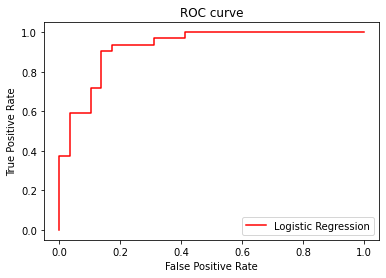

In [132]:
plot_roc_curve(gs_model,X_test,y_test,color='red')
plt.title("ROC curve")
plt.legend(['Logistic Regression']);

Confusion matrix

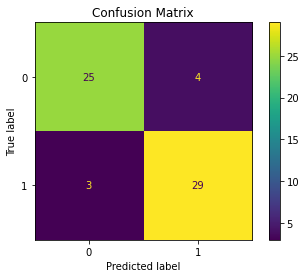

In [133]:
con_mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(gs_model,X_test,y_test);
plt.title("Confusion Matrix");


Classification Report

In [134]:
print('The Classification Report is as follow:\n',classification_report(y_test,y_pred))

The Classification Report is as follow:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Cross validated Accuracy

In [135]:
gs_model.best_params_

{'C': 0.20433597178569418, 'max_iter': 50, 'solver': 'liblinear'}

In [136]:
clf=LogisticRegression(C=0.20433597178569418,max_iter=180,solver='liblinear',verbose=0)
def evaluate_model(clf,metric):
    return cross_val_score(clf,X,y,cv=5,scoring=metric,verbose=0).mean()

In [137]:
cv_accuracy=evaluate_model(clf,'accuracy');
print(f'The Cross Validated accuray is {cv_accuracy*100:0.2f} ')

The Cross Validated accuray is 84.47 


Cross validated Pricision

In [138]:
cv_precision=evaluate_model(clf,'precision');
print(f'The Cross Validated precision is {cv_precision*100:0.2f} ')

The Cross Validated precision is 82.08 


Cross validated Recall

In [139]:
cv_recall=evaluate_model(clf,'recall');
print(f'The Cross Validated recall is {cv_recall*100:0.2f} ')

The Cross Validated recall is 92.12 


Cross validated F-Score

In [140]:
cv_f_score=evaluate_model(clf,'f1');
print(f'The Cross Validated F-Score is {cv_f_score:.2f} ')

The Cross Validated F-Score is 0.87 


In [141]:
cv_metrics=pd.DataFrame({'Accuracy':cv_accuracy,
                          'Pricision':cv_precision,
                           'Recall':cv_recall,
                            'F-Score':cv_f_score
                          },index=[0])

In [142]:
cv_metrics

,Accuracy,Pricision,Recall,F-Score
0,0.844699,0.820794,0.921212,0.867301


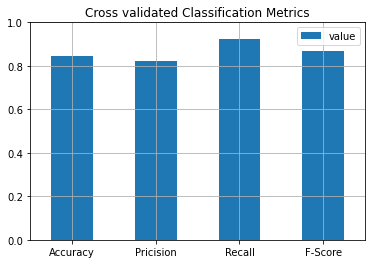

In [143]:
cv_metrics.T.plot(kind='bar',grid=True)
plt.xticks(rotation=0);
plt.ylim([0,1])
plt.legend(['value'])
plt.title('Cross validated Classification Metrics');

# Feature Importance

In [145]:
gs_model.best_params_

{'C': 0.20433597178569418, 'max_iter': 50, 'solver': 'liblinear'}

In [146]:
clf=LogisticRegression(C=0.20433597178569418,max_iter=180,solver='liblinear',verbose=0)
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, max_iter=180, solver='liblinear')

In [147]:
clf.coef_


array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [148]:
clf.coef_.shapeape

(1, 13)

In [198]:
feature_importance=pd.DataFrame(data={
          'Features':X.columns.to_list(),
           'Importance':clf.coef_[0]
},index=None).sort_values(by='Importance',ascending=False)
feature_importance

,Features,Importance
2,cp,0.660670
10,slope,0.450516
6,restecg,0.312758
5,fbs,0.043861
7,thalach,0.024594
0,age,0.003167
4,chol,-0.001664
3,trestbps,-0.011570
9,oldpeak,-0.568628
8,exang,-0.604131


In [199]:
list(feature_importance['Features'])

['cp',
 'slope',
 'restecg',
 'fbs',
 'thalach',
 'age',
 'chol',
 'trestbps',
 'oldpeak',
 'exang',
 'ca',
 'thal',
 'sex']

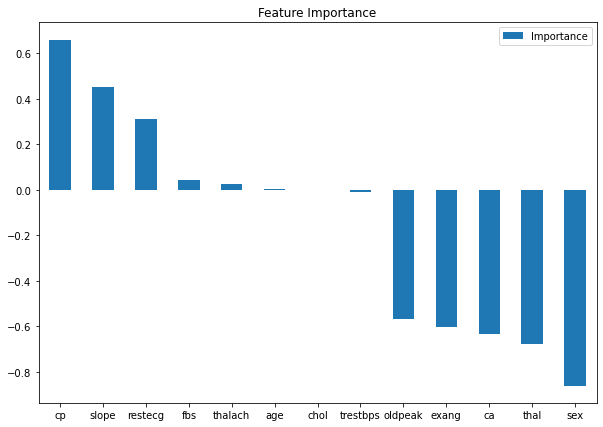

In [200]:
plt.figure(figsize=(10,7))
feature_importance['Importance'].plot(kind='bar',title='Feature Importance');
plt.legend()
# plt.xlim([1,12])
plt.xticks([x for x in range(0,13,1)],list(feature_importance['Features']),rotation=0);



<AxesSubplot:xlabel='slope'>

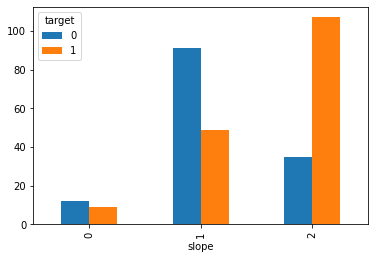

In [201]:
pd.crosstab(df['slope'],df['target']).plot(kind='bar')

In [203]:
from joblib import load,dump
dump(gs_model,open("model.joblib",'wb'))